In [39]:
import json
from glob import glob

In [43]:
# import coco_text.json 

with open('../COCO_Text.json') as f:
    coco_text = json.load(f)

In [44]:
coco_text.keys()

dict_keys(['imgs', 'imgToAnns', 'cats', 'anns', 'info'])

In [45]:
# dictionary with names of images that have text in them as keys and annotation mapping keys as values
# extending the image names to match the names in images folder
imgs_with_text = {}
for img in coco_text['imgs'].keys():
    if coco_text['imgToAnns'][img]:
        imgs_with_text['COCO_train2014_'+img.zfill(12)+'.jpg'] = coco_text['imgToAnns'][img]
        
list(imgs_with_text.items())[:5]

[('COCO_train2014_000000287140.jpg', [1058591, 1058590]),
 ('COCO_train2014_000000370258.jpg',
  [1005864, 1005863, 1143254, 1209515, 1209514, 1209513]),
 ('COCO_train2014_000000036606.jpg', [1067513]),
 ('COCO_train2014_000000286892.jpg', [1059039, 1059038]),
 ('COCO_train2014_000000286897.jpg', [1032797, 1209689, 1209690, 1209691])]

In [ ]:
# crop all such images according to the bouding boxes given in coco_text['anns']
# store these images in 

bbox = []

for img_name, anns_li in imgs_with_text.items():
    print(img_name)
    for ann in anns_li:
        if 'utf8_string' not in coco_text['anns'][str(ann)].keys():
            continue
        img = Image.open('./train2014/'+img_name)
        bbox = coco_text['anns'][str(ann)]['bbox']
        try:
            img.crop((bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3])).save('./text_only/legible/'+coco_text['anns'][str(ann)]['utf8_string']+'.jpg')
        except:
            pass

In [1]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset


In [2]:
image_files = glob.glob(os.path.join(config.DATA_DIR, '*.jpg'))
# "/../../image.jpg"  -> 'image'
targets_orig = [x.split('/')[-1][:-4] for x in image_files]
# 'abcde' -> ['a','b','c','d','e']
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)

targets_enc = [lbl_enc.transform(x) for x in targets]
# adding 1, to secure the place of 0 for unknown labels
targets_enc = np.array(targets_enc) + 1

# print(targets_enc)
# print(len(lbl_enc.classes_))

train_imgs, test_imgs, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=42)

train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs, targets=train_targets, resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))
# train_loader = torch.utils.data.DataLoader(
#     train_dataset,
#     batch_size= config.BATCH_SIZE,
#     shuffle=True
# )

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_dataset[0]['images'].size()   # here you have channels first

torch.Size([3, 75, 150])

In [5]:
train_dataset[1]['targets']

tensor([68, 73, 80, 68, 80])

In [16]:
npimg = train_dataset[300]['images'].numpy()

In [17]:
npimg.shape

(3, 75, 150)

In [18]:
# transpose the image to channel last
np.transpose(npimg, (1,2,0)).shape

(75, 150, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


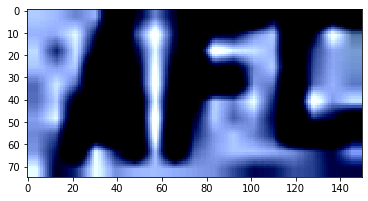

In [19]:
plt.imshow(np.transpose(npimg, (1,2,0)))

In [20]:
from glob import glob

In [21]:
len(glob('../text_only/legible/*'))

35826

In [22]:
glob('../text_only/legible/*')[0]

'../text_only/legible/ries.jpg'

In [23]:
from shutil import copyfile
# copyfile(src, dst)

In [46]:
# copyfile('../text_only/legible/ries.jpg', '../text_only/try_1/')

In [37]:
dest = '../text_only/legible/ries.jpg'.split('/')
dest[2] = 'try_1'
dest = "/".join(dest)
dest 

'../text_only/try_1/ries.jpg'

In [36]:
dest

['..', 'text_only', 'try_1', 'ries.jpg']

In [38]:
for file in glob('../text_only/legible/*')[1:500]:
    dest = file.split('/')
    dest[2] = 'try_1'
    dest = '/'.join(dest)
    copyfile(file, dest)